# **Project Overview**

This project analyzes a global dataset of natural disasters from 1900 to 2021 to understand long term trends in disaster occurrence and impact. The analysis focuses on identifying how different disaster types vary in frequency, human impact, and economic damage across regions and over time.


## Dataset Description

The dataset contains 16,126 recorded natural disaster events worldwide between 1900 and 2021. Each record includes information about the disaster type, geographic location, time of occurrence, and measures of human and economic impact such as total deaths, number of people affected, and estimated damages.


## Questions Explored

1. Which types of natural disasters occur most frequently?
2. How has the frequency of disaster events changed over time?
3. Which disaster types cause the highest human impact?
4. Which disaster types result in the greatest economic damage?
5. How does disaster frequency and impact vary across continents?

In [58]:
import pandas as pd

original = pd.read_csv("/content/1900_2021_DISASTERS.xlsx - emdat data.csv")
df = original.copy()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16126 entries, 0 to 16125
Data columns (total 45 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        16126 non-null  int64  
 1   Seq                         16126 non-null  int64  
 2   Glide                       1581 non-null   object 
 3   Disaster Group              16126 non-null  object 
 4   Disaster Subgroup           16126 non-null  object 
 5   Disaster Type               16126 non-null  object 
 6   Disaster Subtype            13016 non-null  object 
 7   Disaster Subsubtype         1077 non-null   object 
 8   Event Name                  3861 non-null   object 
 9   Country                     16126 non-null  object 
 10  ISO                         16126 non-null  object 
 11  Region                      16126 non-null  object 
 12  Continent                   16126 non-null  object 
 13  Location                    143

# **Data cleaning**

Before conducting the analysis,  data preparation was performed to ensure the dataset was suitable for analysis. The analysis focuses only on relevant temporal, geographic, and impact related fields. Impact related columns were inspected to ensure they were stored in numeric format and suitable for analysis. Since these fields were already correctly parsed, no additional transformations were required.


In [59]:
# Select relevant columns for analysis
columns = [
    'Year',
    'Disaster Type',
    'Country',
    'Region',
    'Continent',
    'Total Deaths',
    'Total Affected',
    "Total Damages ('000 US$)"
]

df = df[columns]

# Convert impact columns to numeric
impact = [
    'Total Deaths',
    'Total Affected',
    "Total Damages ('000 US$)"
]

for col in impact:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df.info()

# Check data completeness
total_events = len(df)
deaths_count = df['Total Deaths'].notna().sum()
damage_count = df["Total Damages ('000 US$)"].notna().sum()

print("\nData Completeness:")
print(f"Events with death data: {deaths_count} ({deaths_count/total_events*100:.1f}%)")
print(f"Events with damage data: {damage_count} ({damage_count/total_events*100:.1f}%)")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16126 entries, 0 to 16125
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      16126 non-null  int64  
 1   Disaster Type             16126 non-null  object 
 2   Country                   16126 non-null  object 
 3   Region                    16126 non-null  object 
 4   Continent                 16126 non-null  object 
 5   Total Deaths              11413 non-null  float64
 6   Total Affected            11617 non-null  float64
 7   Total Damages ('000 US$)  5245 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 1008.0+ KB

Data Completeness:
Events with death data: 11413 (70.8%)
Events with damage data: 5245 (32.5%)


In [60]:
# Dataset overview
print("="*50)
print("DATASET OVERVIEW")
print("="*50)

print(f"Total disaster events: {len(df)}")
print(f"Time period: {df['Year'].min()} - {df['Year'].max()}")
print(f"Number of countries: {len(df['Country'].unique())}")
print(f"Number of continents: {len(df['Continent'].unique())}")
print(f"Disaster types: {len(df['Disaster Type'].unique())}")
print("="*50)

DATASET OVERVIEW
Total disaster events: 16126
Time period: 1900 - 2021
Number of countries: 228
Number of continents: 5
Disaster types: 15


### Question 1: What type of natural disasters occur most frequently?

This analysis examines the distribution of disaster events by type to understand which natural disasters are most commonly recorded in the dataset.

In [61]:
import matplotlib.pyplot as plt

#count the number of events by type of disaster
disastertype_count = df['Disaster Type'].value_counts()

#display the count
disastertype_count

# Percentages for top disaster types
total = len(df)

print("\nDisaster Type Distribution:")
for disaster in disastertype_count.head(5).index:
    count = disastertype_count[disaster]
    p = (count / total) * 100
    p = round(p, 1)
    print(f"{disaster}: {count} events ({p}%)")


Disaster Type Distribution:
Flood: 5551 events (34.4%)
Storm: 4496 events (27.9%)
Earthquake: 1544 events (9.6%)
Epidemic: 1501 events (9.3%)
Landslide: 776 events (4.8%)


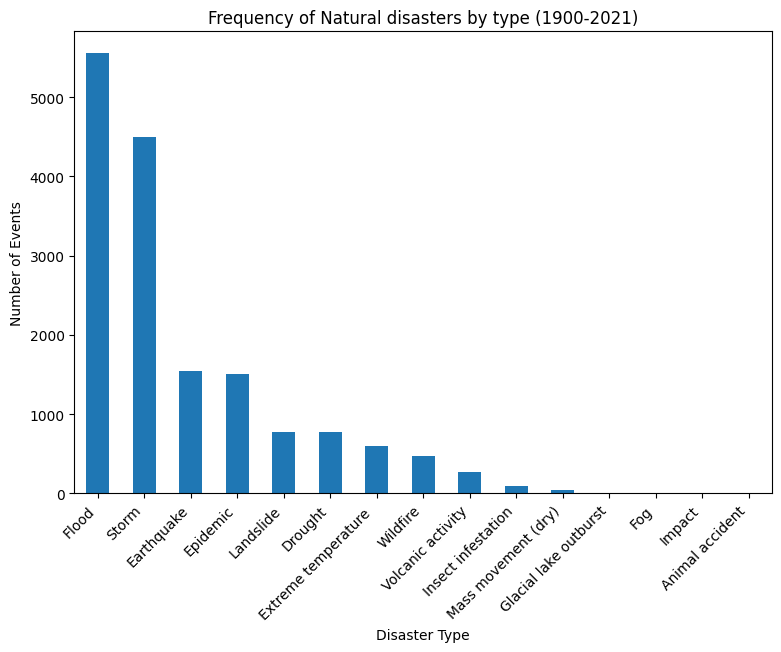

In [62]:
import matplotlib.pyplot as plt

#plot frequency of disaster by type
plt.figure(figsize=(9, 6))
disastertype_count.plot(kind='bar')
plt.title('Frequency of Natural disasters by type (1900-2021)')
plt.xlabel('Disaster Type')
plt.ylabel('Number of Events')
plt.xticks(rotation=45, ha='right')
plt.show()

**Analysis:**  
Floods (34.4%) and storms (27.9%) are the most frequently recorded natural disasters in the dataset, together representing 62.3% of all events. They occur far more often than other disaster types. Earthquakes and epidemics appear next in frequency, while several disaster categories are relatively rare and have little impact on overall trends. Overall, the data shows that hydrological and meteorological disasters dominate global disaster records from 1900 to 2021.


### Question 2: How has the frequency of disaster events changed over time?

This analysis looks at how the number of recorded disaster events has changed across years to identify long term trends.


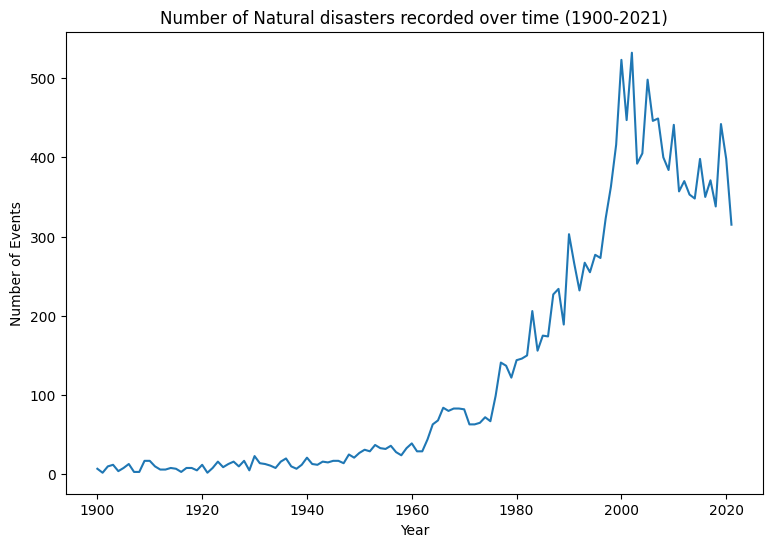

In [63]:
# count the number of disasters per year
disastersperyear_count = df.groupby('Year').size()

# plot total number of disasters per year
plt.figure(figsize=(9, 6))
disastersperyear_count.plot()

# Add title and axis labels
plt.title('Number of Natural disasters recorded over time (1900-2021)')
plt.xlabel('Year')
plt.ylabel('Number of Events')
plt.show() #display plot


**Analysis:**  
The data shows that recorded natural disasters were relatively uncommon and stable in the early 20th century, followed by a steady increase after the 1950s. The sharp rise from the 1970s onward suggests a major shift, likely influenced by improved global reporting systems as well as increased exposure of populations to natural hazards. Although the number of events fluctuates in recent decades, disaster counts remain consistently higher than earlier periods, indicating a long-term upward trend in recorded disaster activity.


### Question 3: Which disaster types cause the highest human impact?

This analysis compares disaster types based on total deaths and the total number of people affected to understand which events have the greatest human impact.


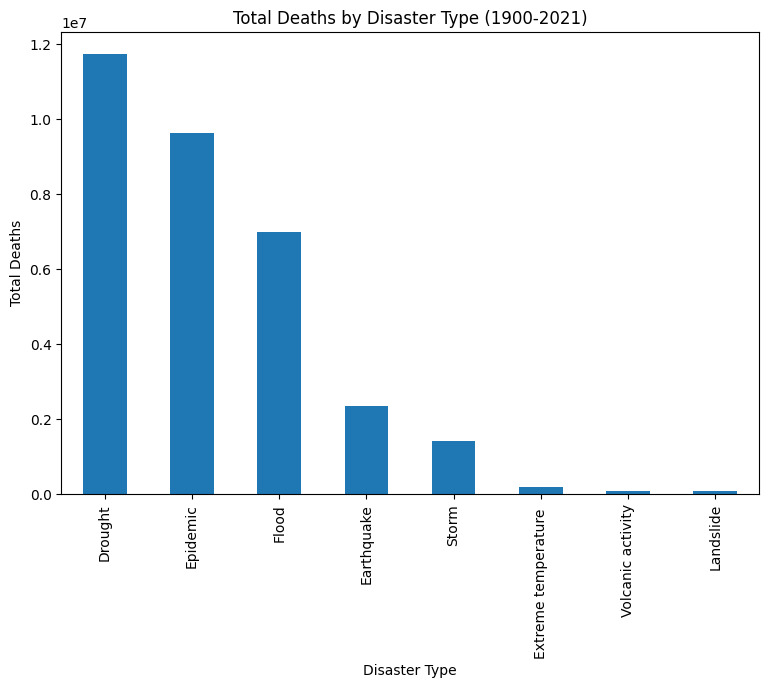

In [64]:
#Group by disaster type and human impact (total affected and total deaths)
impact = df.groupby('Disaster Type')[['Total Deaths', 'Total Affected']].sum()

#top 8 disaster types with the highest total deaths
highest_deaths = impact.sort_values(by='Total Deaths', ascending=False).head(8)

# Plot total deaths for the most impactful disaster types
plt.figure(figsize=(9, 6))
highest_deaths['Total Deaths'].plot(kind='bar')

# Add title and axis labels
plt.title('Total Deaths by Disaster Type (1900-2021)')
plt.xlabel('Disaster Type')
plt.ylabel('Total Deaths')
plt.show() #display plot




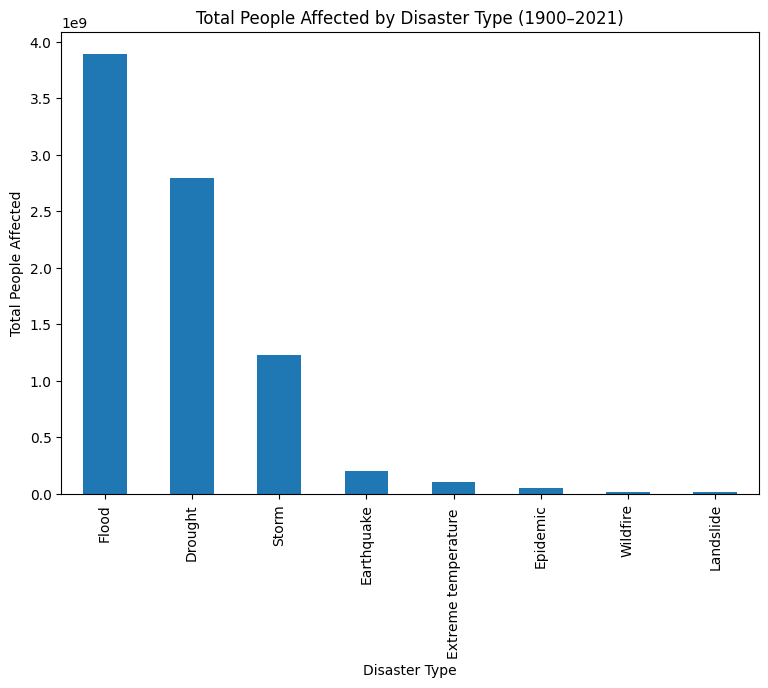

In [65]:
# Select the top 8 disaster types with the highest total number of people affected
highest_affected = impact.sort_values(by='Total Affected', ascending=False).head(8)

# Plot total people affected for the most impactful disaster types
plt.figure(figsize=(9, 6))
highest_affected['Total Affected'].plot(kind='bar')

# Add title and axis labels
plt.title('Total People Affected by Disaster Type (1900–2021)')
plt.xlabel('Disaster Type')
plt.ylabel('Total People Affected')

# Display the plot
plt.show()


**Analysis:**  
Droughts and epidemics are responsible for the highest number of total deaths, indicating that these disasters tend to be especially severe and prolonged, often affecting vulnerable populations over extended periods. Floods and earthquakes also contribute significantly to mortality, but to a lesser extent compared to droughts and epidemics.  

In terms of the number of people affected, floods and droughts have the widest overall impact, influencing far more individuals than other disaster types. This contrast highlights that while some disasters are deadlier, others primarily cause large-scale disruption and displacement, showing that frequency and human impact vary depending on the type of disaster.


### Question 4: Which disaster types cause the highest economic damage?

This analysis examines total economic losses across disaster types to identify which events result in the greatest financial impact.


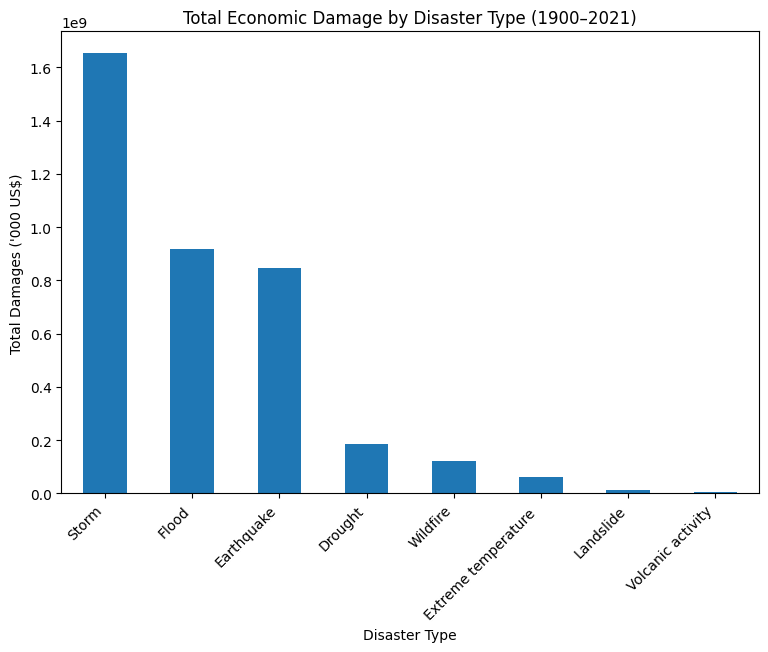

In [66]:
# Group by disaster type and sum total economic damages
damage_by_type = df.groupby('Disaster Type')[["Total Damages ('000 US$)"]].sum()

# top 8 disaster types by total damage
top_damage = damage_by_type.sort_values(
    by="Total Damages ('000 US$)",
    ascending=False
).head(8)

top_damage

plt.figure(figsize=(9, 6))

top_damage["Total Damages ('000 US$)"].plot(kind='bar')

plt.title('Total Economic Damage by Disaster Type (1900–2021)')
plt.xlabel('Disaster Type')
plt.ylabel("Total Damages ('000 US$)")
plt.xticks(rotation=45, ha='right')
plt.show()



**Analysis:**  
Storms and floods account for the highest total economic losses among all disaster types. Earthquakes also contribute substantially to economic damage despite occurring less frequently. This indicates that certain disasters tend to result in significantly higher financial losses compared to others over time.



### Question 5: How does disaster frequency and impact vary across continents?

This analysis examines how natural disasters are distributed across continents and compares their overall human impact.


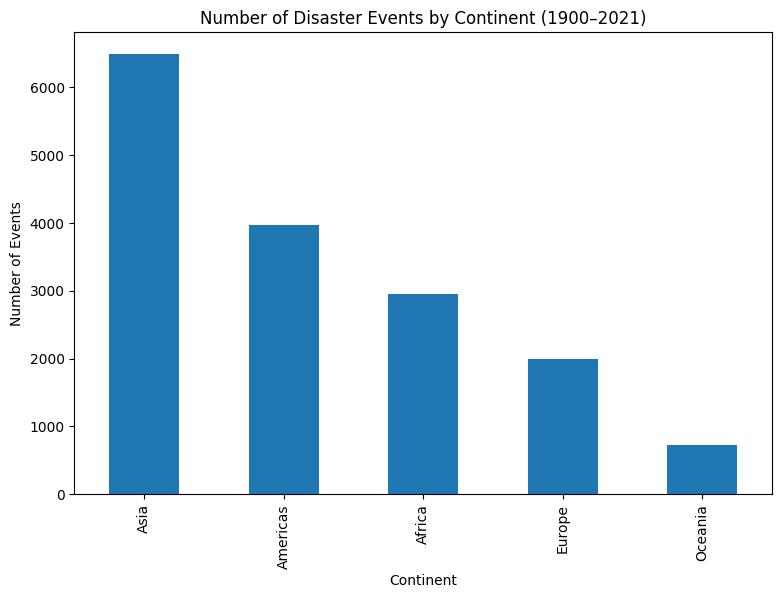

In [67]:
# Count number of disaster events per continent
disasters_by_continent = df.groupby('Continent').size().sort_values(ascending=False)

# Plot disaster frequency by continent
plt.figure(figsize=(9, 6))
disasters_by_continent.plot(kind='bar')

# Add title and axis labels
plt.title('Number of Disaster Events by Continent (1900–2021)')
plt.xlabel('Continent')
plt.ylabel('Number of Events')

# Display the plot
plt.show()



In [68]:
# Loop through each continent
for continent in df['Continent'].unique():
    print(f"\n{continent}")

    # Count disaster types within this continent
    top_types = (
        df[df['Continent'] == continent]['Disaster Type']
        .value_counts()
        .head(3)
    )

    print(top_types)



Africa
Disaster Type
Flood       1147
Epidemic     878
Drought      341
Name: count, dtype: int64

Asia
Disaster Type
Flood         2303
Storm         1884
Earthquake     903
Name: count, dtype: int64

Americas
Disaster Type
Storm         1442
Flood         1275
Earthquake     314
Name: count, dtype: int64

Europe
Disaster Type
Flood                   668
Storm                   542
Extreme temperature     273
Name: count, dtype: int64

Oceania
Disaster Type
Storm         338
Flood         158
Earthquake     56
Name: count, dtype: int64


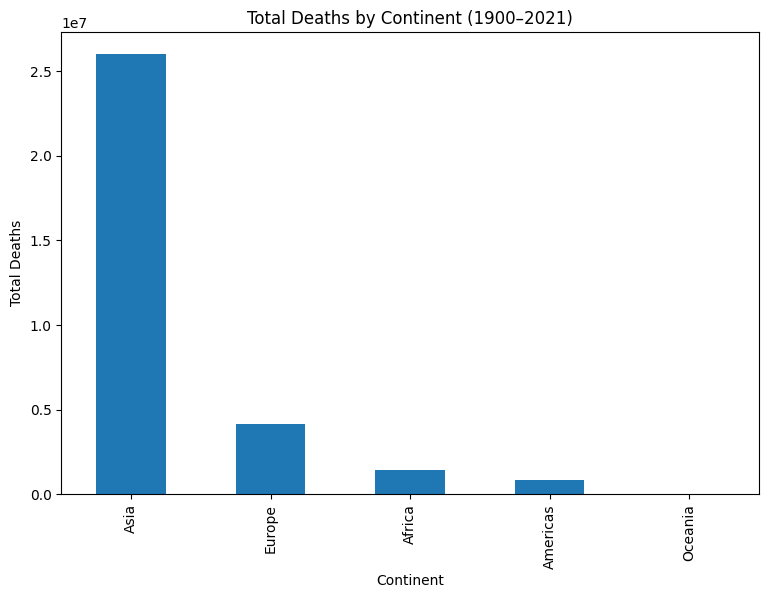

In [69]:
# Total deaths and total affected grouped by continent
impact_by_continent = df.groupby('Continent')[['Total Deaths', 'Total Affected']].sum()

# Plot total number of people affected by disasters for each continent
plt.figure(figsize=(9, 6))
impact_by_continent.sort_values(by='Total Deaths', ascending=False)['Total Deaths'].plot(kind='bar')

# Add title and axis labels
plt.title('Total Deaths by Continent (1900–2021)')
plt.xlabel('Continent')
plt.ylabel('Total Deaths')

# Display the plot
plt.show()



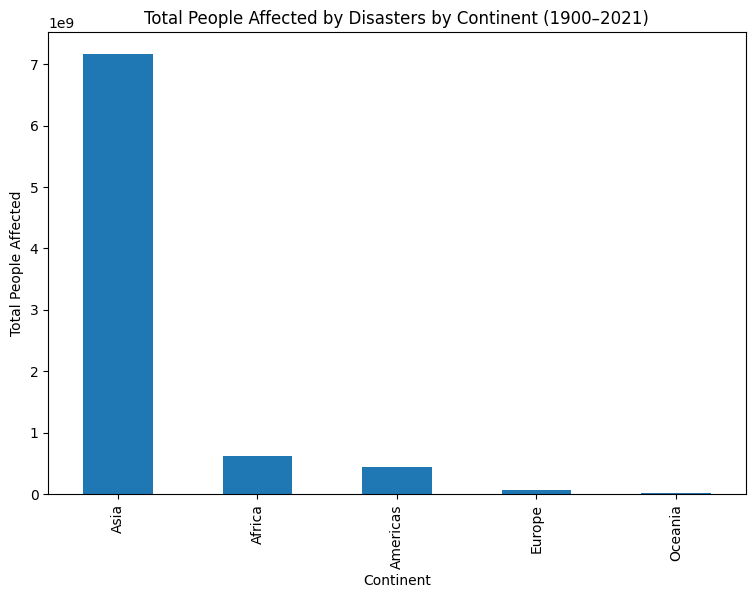

In [70]:
# Plot total number of people affected by disasters for each continent
plt.figure(figsize=(9, 6))
impact_by_continent.sort_values(by='Total Affected', ascending=False)['Total Affected'].plot(kind='bar')

# Add title and axis labels
plt.title('Total People Affected by Disasters by Continent (1900–2021)')
plt.xlabel('Continent')
plt.ylabel('Total People Affected')

# Display the plot
plt.show()


**Analysis:**   

While dominant disaster patterns vary by region, certain trends emerge across continents. In Asia, floods, storms, and earthquakes occur most frequently, which aligns with the continent having the highest number of disasters as well as the greatest total deaths and people affected. This suggests that both high exposure and the presence of high impact disaster types contribute to Asia’s overall vulnerability.

In Africa, floods and epidemics are the most frequent disasters. Despite having fewer total disaster events than Asia and the Americas, Africa shows a disproportionately high number of deaths and affected populations, indicating that disasters in the region tend to be more severe in terms of human impact.  

The Americas and Oceania are dominated mainly by storms and floods, resulting in relatively high disaster frequency but lower overall human impact compared to Asia and Africa. Europe shows a mix of floods, storms, and extreme temperature events, yet records comparatively lower deaths and affected populations. Overall, regional differences in dominant disaster types help explain why continents with fewer events can still experience greater human impact.



# **Conclusion**

This analysis explored global natural disaster patterns from 1900 to 2021 by examining disaster frequency, trends over time, human impact, economic losses, and regional differences. The results show a clear increase in recorded disaster events over time, with floods and storms being the most frequent disaster types worldwide. However, frequency does not always translate to severity, as droughts and epidemics account for a disproportionately high number of deaths, while floods and droughts affect the largest number of people overall.

Regional analysis highlights strong geographic disparities. Asia experiences the highest disaster exposure and human impact due to both high event frequency and the presence of high impact disaster types. Africa, despite fewer recorded events, shows relatively severe human consequences, suggesting greater vulnerability. Overall, the findings emphasize that disaster impact varies significantly by type and region, underscoring the importance of context when assessing global disaster risk.


# **Limitations**

- The dataset relies on historical records, and earlier years may suffer from underreporting or incomplete documentation of disaster events.
- Human and economic impact values contain missing data for some disasters, which may affect the accuracy of aggregated totals.
- The analysis focuses on reported disaster events and does not account for differences in population size, preparedness, or response capacity across regions.
